In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

import glob
import imageio

In [2]:
def compute_Z_nZ_table(n):
    R = list(range(n))
    mult_mod = lambda x,y: x*y % n
    table = np.array(list(mult_mod(x,y) for x,y in product(R,R)))
    table = table.reshape(n,n)
    units = sorted(np.where(table == 1)[0])
    return table, units

In [3]:
n_range = list(range(2,400))
solution = {n: compute_Z_nZ_table(n) for n in n_range}
table, units = solution[5]
unit_pattern = (table == 1).astype(int)

In [4]:
table

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 2, 4, 1, 3],
       [0, 3, 1, 4, 2],
       [0, 4, 3, 2, 1]])

In [5]:
units

[1, 2, 3, 4]

In [6]:
unit_pattern

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1]])

In [7]:
perc_units = []
for n, sol in solution.items():
    table, units = sol
    num_units = len(units)
    num_el = len(table[0,:])
    perc_units.append(num_units/num_el)

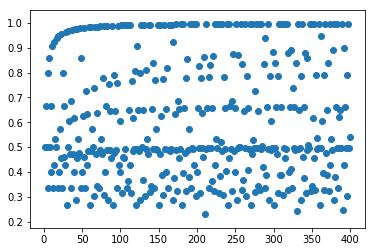

In [8]:
plt.scatter(n_range, perc_units)

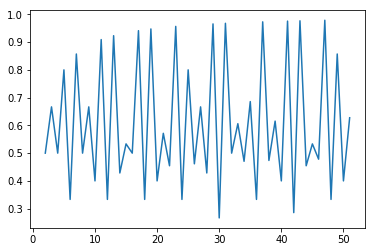

In [9]:
plt.plot(n_range[:50], perc_units[:50])
plt.show()

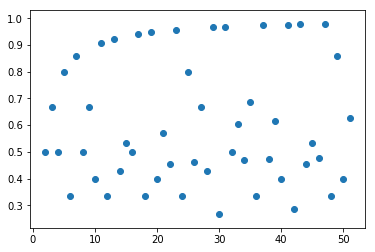

In [10]:
plt.scatter(n_range[:50], perc_units[:50])
plt.show()

In [11]:
ind = np.argmin(perc_units[:50])
print(n_range[ind])
print(perc_units[ind])

30
0.26666666666666666


# Visualization

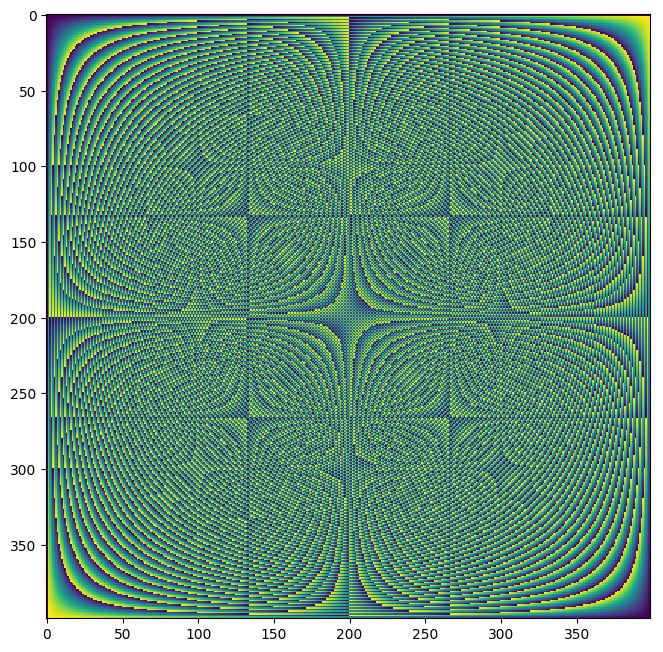

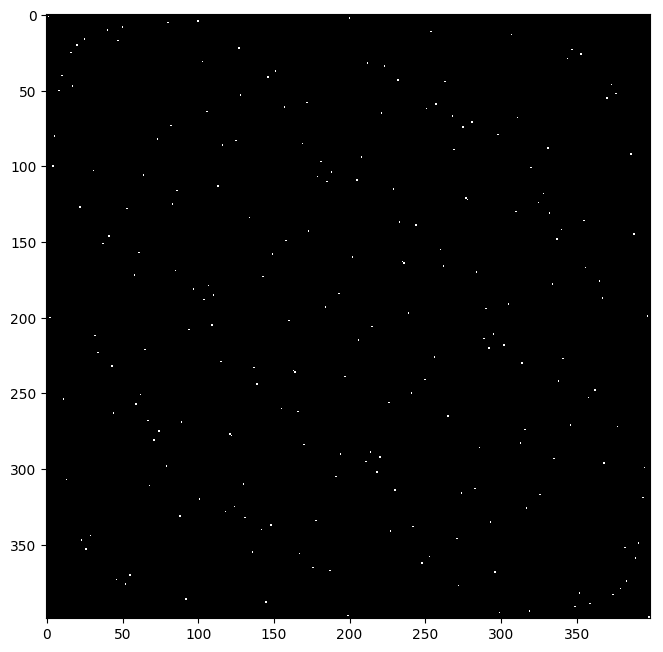

In [12]:
table, units = sol
pattern = (table == 1).astype(int)
fig = plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(table,)
plt.show()
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(pattern, cmap = 'gist_heat')
plt.show()

Make two directories for the png files, *tables_1* and *tables_all*

In [35]:
# Plot 1 terms
for n, sol in solution.items():
    table, units = sol
    pattern = (table == 1).astype(int)
    
    fig = plt.figure(frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(pattern, cmap = 'gist_heat')
    ax.axis('off')
    plt.box(False)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    fig.savefig('tables_1/{0:03}.png'.format(n),bbox_inches="tight", pad_inches = 0)
    plt.close(fig)
    fig.clf()

In [39]:
# Plot all terms
for n, sol in solution.items():
    table, units = sol
    pattern = table
    
    fig = plt.figure(frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(pattern)
    ax.axis('off')
    plt.box(False)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    fig.savefig('tables_all/{0:03}.png'.format(n),bbox_inches="tight", pad_inches = 0)
    plt.close(fig)
    fig.clf()

In [37]:
filenames = sorted(glob.glob('tables_1/*'))
with imageio.get_writer('tables_1.gif', mode='i', fps = 3) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [40]:
filenames = sorted(glob.glob('tables_all/*'))
with imageio.get_writer('tables_all.gif', mode='i', fps = 10) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)